In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Your code goes here


# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [3]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

In [4]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [5]:
# shuffle the input data
import random
random.shuffle(image_data)

In [6]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

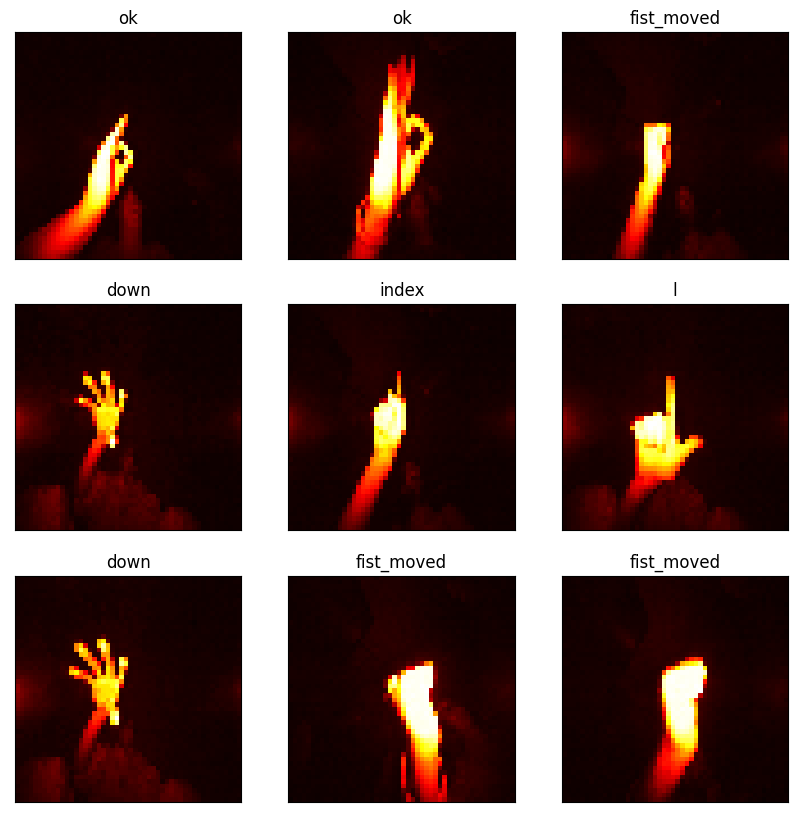

In [7]:
label[:10]
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [8]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [9]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [10]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [35]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [36]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add max pooling layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(units=64))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 31s 68ms/step - loss: 0.2107 - accuracy: 0.9601 - val_loss: 2.4379 - val_accuracy: 0.3440
Epoch 2/7
438/438 [==============================] - 30s 68ms/step - loss: 0.0124 - accuracy: 0.9996 - val_loss: 0.0087 - val_accuracy: 0.9992
Epoch 3/7
438/438 [==============================] - 30s 67ms/step - loss: 0.0063 - accuracy: 0.9997 - val_loss: 0.0300 - val_accuracy: 0.9923
Epoch 4/7
438/438 [==============================] - 29s 66ms/step - loss: 0.0041 - accuracy: 0.9997 - val_loss: 0.0448 - val_accuracy: 0.9863
Epoch 5/7
438/438 [==============================] - 29s 67ms/step - loss: 0.0128 - accuracy: 0.9975 - val_loss: 0.8084 - val_accuracy: 0.8073
Epoch 6/7
438/438 [==============================] - 29s 67ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 7/7
438/438 [==============================] - 29s 67ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0016 - val_accuracy: 0.9995

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 3s 16ms/step - loss: 0.0016 - accuracy: 0.9995
Test accuracy: 99.95%


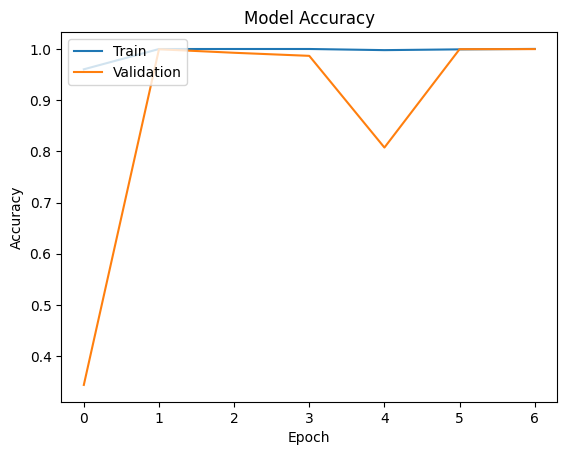

In [39]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
import time
import keras
# Print the summary to get the number of parameters
model.summary()

# Measure the inference time for a sample input
input_shape = (1, IMG_SIZE, IMG_SIZE, 1)
sample_input = keras.backend.random_uniform(input_shape)
start_time = time.time()
_ = model.predict(sample_input)
inference_time = (time.time() - start_time) * 1000  # convert to milliseconds

# Print the number of parameters and the inference time
num_params = model.count_params()
print(f'Number of parameters: {num_params}')
print(f'Inference time: {inference_time:.2f} ms')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 50, 50, 8)         80        
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 8)        32        
 ormalization)                                                   
                                                                 
 activation_6 (Activation)   (None, 50, 50, 8)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 16)        1168      
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 50, 50, 16)       